In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_airplane = pd.read_table('Airplane_Crashes_and_Fatalities_Since_1908.csv', sep=',')
df_airplane['Date'] = pd.to_datetime(df_airplane.Date)
df_airplane['Year'] = df_airplane.Date.dt.year #Creando la columna 'Year', para mas adelante poder agrupor por años.
df_airplane.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913


- Tamaño del DataFrame

In [3]:
df_airplane.shape

(5268, 14)

- Nombre de las columnas del DataFrame

In [4]:
df_airplane.columns

Index([u'Date', u'Time', u'Location', u'Operator', u'Flight #', u'Route',
       u'Type', u'Registration', u'cn/In', u'Aboard', u'Fatalities', u'Ground',
       u'Summary', u'Year'],
      dtype='object')

## Analizar en qué variables hay valores nulos y el porcentaje de los mismos.

### Cuenta de Nulos y su porcentaje respecto al total de registros

In [5]:
nulos = df_airplane.isnull().sum().reset_index()
nulos['Porcentaje'] = nulos[0]/len(df_airplane)
nulos.rename(columns={0:'Registros'}, inplace=True)
nulos


,index,Registros,Porcentaje
0,Date,0,0.000000
1,Time,2219,0.421222
2,Location,20,0.003797
3,Operator,18,0.003417
4,Flight #,4199,0.797077
5,Route,1706,0.323842
6,Type,27,0.005125
7,Registration,335,0.063591
8,cn/In,1228,0.233106
9,Aboard,22,0.004176


## Dibujar la tendencia de número accidentes en escala temporal, agrupando el dataset por años. ¿Puede decirse que hay un incremento o decremento de la siniestralidad? ¿Qué relación tiene con la expansión del tráfico aéreo en el tiempo?

In [6]:
%matplotlib inline
byyear = df_airplane.copy()
byyear = byyear.groupby('Date').size().reset_index().sort_values('Date', ascending=True)
byyear.rename(columns={0:'Registros'}, inplace=True)
#plt.plot(byyear.Date,byyear.Registros)
#plt.plot(byyear.Registros)
byyear.head()

,Date,Registros
0,1908-09-17,1
1,1912-07-12,1
2,1913-08-06,1
3,1913-09-09,1
4,1913-10-17,1


### Converting Date column to Datetime

In [7]:
byyear['Date']= pd.to_datetime(byyear.Date)
byyear['Year'],byyear['Month'] = byyear['Date'].dt.year, byyear['Date'].dt.month
byyear.head()

,Date,Registros,Year,Month
0,1908-09-17,1,1908,9
1,1912-07-12,1,1912,7
2,1913-08-06,1,1913,8
3,1913-09-09,1,1913,9
4,1913-10-17,1,1913,10


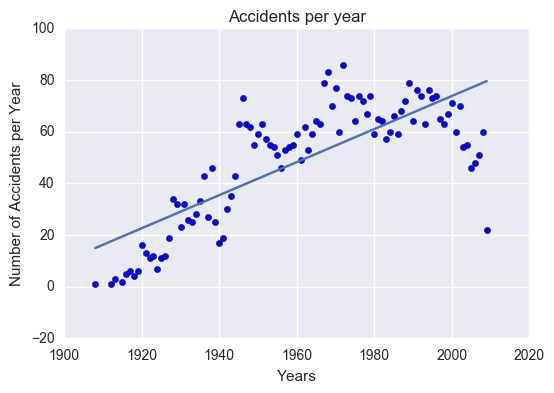

In [8]:
byyearplt = byyear.groupby('Year').size().reset_index()
byyearplt.rename(columns={0:'Registros'},inplace=True)
m,b = np.polyfit(byyearplt.Year, byyearplt.Registros, 1)
#byyearplt = byyearplt[byyearplt.Year > 2000]
byyearplt.head()
plt.scatter(byyearplt.Year,byyearplt.Registros);
plt.plot(byyearplt.Year, m*byyearplt.Year+ b, '-');
plt.xlabel('Years');
plt.ylabel('Number of Accidents per Year');
plt.title('Accidents per year');


Podemos ver que la tendencia de accidentes es creciente año a año, sin embargo gráficamente podemos ver que se han reducido significativamente los accidentes desde el año 2000, respecto a los años anteriores. Sin embargo podemos ver que la relacion es directa.

### Obtener y dibujar las frecuencias del número de accidentes por tipo de avión. ¿se parece a alguna distribución conocida? Hacer el análisis en cuanto a las rutas. ¿hay algún hallazgo que parezca relevante?

In [9]:
#import sys
#reload(sys)
#sys.setdefaultencoding("utf-8")

byplane = df_airplane.copy()
byplane = byplane.groupby('Type').size().reset_index().sort_values(0,ascending=False)
byplane.rename(columns={0:'Registros'},inplace=True)


### Accidentes por avión top10 por número de Accidentes

In [10]:
byplane.head(10)

,Type,Registros
1178,Douglas DC-3,334
2388,de Havilland Canada DHC-6 Twin Otter 300,81
1097,Douglas C-47A,74
1089,Douglas C-47,62
1230,Douglas DC-4,40
2340,Yakovlev YAK-40,37
125,Antonov AN-26,36
1598,Junkers JU-52/3m,32
1119,Douglas C-47B,29
1045,De Havilland DH-4,28


### Gráfico de accidentes por avión

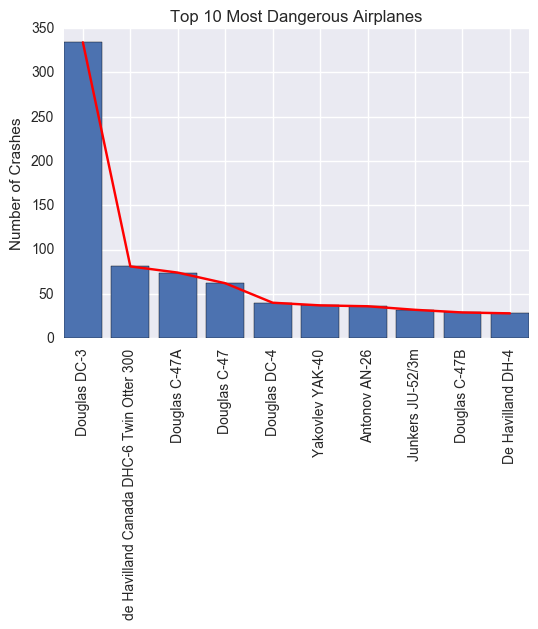

In [11]:
x = np.arange(0,10) #2.446 registros
names = np.asarray(byplane.Type[0:10])
plt.xticks(x,names, rotation=90)
plt.bar(x,byplane.Registros[0:10],align='center')
plt.title('Top 10 Most Dangerous Airplanes')
plt.ylabel('Number of Crashes')
plt.plot(x[0:10],byplane.Registros[0:10],'r-')
plt.show()

Gráficamente notamos que de los aviones con mas accidentes es el Douglas DC-3. Por otro lado dentro del top 5 encontramos 4 que son de la linea de fabricación Douglas, mostrando una clara evidencia que eran de los aviones mas peligrosos.

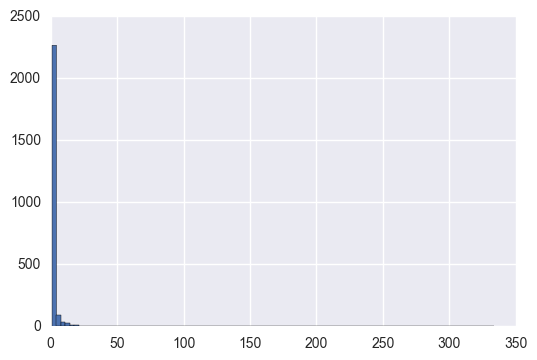

In [12]:
plt.hist(byplane.Registros,bins=100);

Podemos notar graficamente, que su distribucion es parecida a la de Pareto.

### Accidentes por Rutas top10

In [13]:
byRoute = df_airplane.copy()
byRoute = byRoute.groupby(['Route']).size().reset_index().sort_values(0, ascending=False)
byRoute.rename(columns={0:'Registros'},inplace=True)
byRoute.head(10)

,Route,Registros
3029,Training,81
2790,Sightseeing,29
2979,Test flight,17
2978,Test,6
2711,Sao Paulo - Rio de Janeiro,5
2710,Sao Paulo - Porto Alegre,4
2576,Saigon - Paris,4
385,Bogota - Barranquilla,4
3144,Villavicencio - Mitu,4
1621,London - Glasgow,3


Encontramos que el mayor numero de accidentes es cuando estan en estapa de entrenamiento.

### Gráfico de accidentes por avión

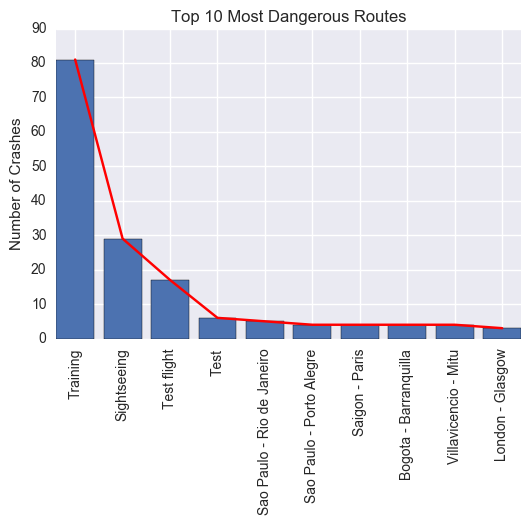

In [14]:
x = np.arange(0,10) #2.446 registros
names = np.asarray(byRoute.Route[0:10])
plt.xticks(x,names, rotation=90)
plt.bar(x,byRoute.Registros[0:10],align='center')
plt.title('Top 10 Most Dangerous Routes')
plt.ylabel('Number of Crashes')
plt.plot(x[0:10],byRoute.Registros[0:10],'r-')
plt.show()

### Filtering Not Army Airplanes

In [15]:
airplaneNA = df_airplane.copy()
airplaneNA = airplaneNA[airplaneNA['Operator'].notnull()]
print airplaneNA.shape
airplaneNA = airplaneNA[(~airplaneNA['Operator'].str.lower().str.contains('navy|military|army'))]

(5250, 14)


Con el anterior código, hemos filtrado todos y cada unos de los aviones que no sean Militares o de guerra, teniendo ahora aviones comerciales o de compañías de mensajería.

### Not Army Airplanes Table

In [16]:
airplaneNA.head(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913
21,1918-12-16,NaN,"Elizabeth, New Jersey",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,97,NaN,1.0,1.0,0.0,NaN,1918
22,1919-05-25,NaN,"Cleveland, Ohio",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,61,NaN,1.0,1.0,0.0,Caught fire in midair. The pilot leaped from t...,1919


La anterior es la tabla de los aviones que no son de Guerra o del Ejercito.

### Top 10 Not Army airplanes per Crashes

In [17]:
topCrashes = airplaneNA.groupby('Type').size().reset_index().sort_values(0, ascending = False)
topCrashes.head(10)

,Type,0
1008,Douglas DC-3,333
1995,de Havilland Canada DHC-6 Twin Otter 300,77
947,Douglas C-47A,62
1055,Douglas DC-4,39
1971,Yakovlev YAK-40,36
943,Douglas C-47,34
1367,Junkers JU-52/3m,32
912,De Havilland DH-4,28
1069,Douglas DC-6B,26
574,Breguet 14,23


Para este análisis notamos que continua en el primer puesto el Douglas DC-3. Sin embargo ahora son 319 Crashes, debido a que ahora hemos hecho un filtro y hemos sacado todos aquellos aviones que sean Army, Military o Navy.

### Top 10 Not Army Airplanes per Fatalities

In [18]:
topFatalieties = airplaneNA.groupby('Type').sum()[['Fatalities']].sort_values(by='Fatalities', ascending=False)
topFatalieties.head(10)

,Fatalities
Type,
Douglas DC-3,4780.0
Douglas DC-6B,1017.0
McDonnell Douglas DC-9-32,951.0
Douglas DC-4,912.0
Ilyushin IL-18B,852.0
Tupolev TU-134A,809.0
Yakovlev YAK-40,808.0
McDonnell Douglas DC-10-10,804.0
de Havilland Canada DHC-6 Twin Otter 300,745.0


En esta consulta notamos que el avión Dougles DC-3 es uno de los mas peligrosos, teniendo un total de 4.780 muertos, en toda su historia, seguido del Douglas DC-6B con 1.017 Muertes.

### Summary

In [19]:
airplaneNA = airplaneNA[airplaneNA.Summary.notnull()]
summaryExplosion = airplaneNA[airplaneNA.Summary.str.lower().str.contains('explosion')]#Explosion 
summaryNotExplosion = airplaneNA[~airplaneNA.Summary.str.lower().str.contains('explosion')] #No Explosion
summaryExplosion = summaryExplosion[['Type','Fatalities']]
summaryNotExplosion = summaryNotExplosion[['Type','Fatalities']]


### Se elimina los NA de 'summaryNotExplosion'

In [20]:
summaryNotExplosion.dropna(how='any',inplace= True)
len(summaryNotExplosion)

4072

### Cuadro Resumen de vuelos donde se presentaron y no Explosiones

In [21]:
print 'Resumen de las muertes por Explosion'
print '--------------------------------------------------------------------------------------------------------------------'
print summaryExplosion['Fatalities'].describe()
print '--------------------------------------------------------------------------------------------------------------------'
print 'Resumen de las muertes por otras causas (No explosion)'
print '--------------------------------------------------------------------------------------------------------------------'
print summaryNotExplosion['Fatalities'].describe()


Resumen de las muertes por Explosion
--------------------------------------------------------------------------------------------------------------------
count     42.000000
mean      30.238095
std       46.015273
min        0.000000
25%        2.000000
50%       13.000000
75%       44.250000
max      230.000000
Name: Fatalities, dtype: float64
--------------------------------------------------------------------------------------------------------------------
Resumen de las muertes por otras causas (No explosion)
--------------------------------------------------------------------------------------------------------------------
count    4072.000000
mean       20.140226
std        35.457119
min         0.000000
25%         3.000000
50%         7.500000
75%        21.000000
max       583.000000
Name: Fatalities, dtype: float64


Podemos notar que la media de Muertes cuando se presenta una exposion es mas alta a la media de otros eventos que no sean explosiones, sin embargo 42 veces se presento una explosion dentro del avión frente a 4.072 de otros eventos no relacionados a explosiones.

### Modelo Regresion Lineal 'summaryExplosion' vs 'summaryNotExplosion'

Dado que las dos bases de datos no cuentan con la misma cantidad de registros, tomamos 42 datos aleatorios de SummaryNotExposion para poder compararlos.

R cuadrado:  1.12866143753e-05


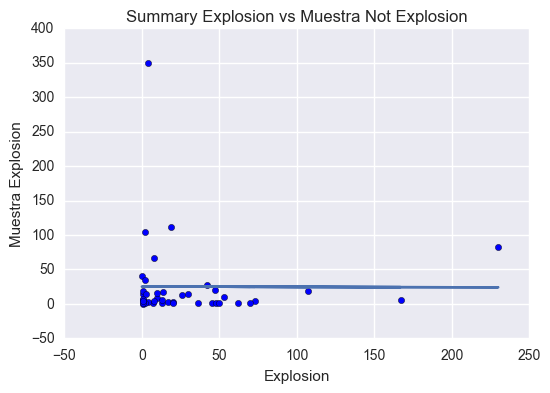

In [22]:
from scipy import stats
import random
muestraNotExplotion = np.asarray(random.sample(summaryNotExplosion.Fatalities,42)) #toma aleatoriamente 42 elementos de 'summaryNotExplosion.Fatalities'
slope, intercept, rvalue, pvalue, stderr = stats.linregress(summaryExplosion.Fatalities,muestraNotExplotion)
print 'R cuadrado: ', rvalue**2
y = summaryExplosion.Fatalities * slope + intercept
plt.scatter(summaryExplosion.Fatalities,muestraNotExplotion);
plt.plot(summaryExplosion.Fatalities, y);
plt.ylabel('Muestra Explosion');
plt.xlabel('Explosion');
plt.title('Summary Explosion vs Muestra Not Explosion');


### Como podemo ver graficamente no hay ninguna realcion entre estas dos bases de Datos, de igual manera si vemos el R cuadrano, notamos que el modelo de regresion lineal no es predictivo.